In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11

# $\mathsf{AgGaS_2}$ phase matching angle

34.05940594059406


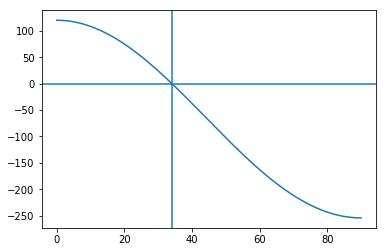

In [38]:
def sellmeier(wavelength, A, B, C):
    temp = np.sum(B * wavelength ** 2 / (wavelength ** 2 - C), axis=0)
    return np.sqrt(A + temp)

n_ord = lambda x: sellmeier(x, 3.397, np.array([2.3982, 2.164]), np.array([0.09311, 950]))
n_ext = lambda x: sellmeier(x, 3.5873, np.array([1.9533, 2.3391]), np.array([0.11066, 1030.7]))

pump = 12500
dfg = 1500
idler = (pump - dfg)/2
signal = pump - idler

def n_angle(angle, wavelength, n_ord, n_ext):
    temp = (np.cos(angle) / n_ord(wavelength)) ** 2 + (np.sin(angle) / n_ext(wavelength)) ** 2
    return np.sqrt(1 / temp)

# assume idler is perpendicular to optic axis
n_idl = n_ord(1e4 / idler)
n_out = n_ord(1e4 / dfg)

angle = np.linspace(0, 90, 10000)
rad = angle * np.pi / 180
n_sig = n_angle(rad, 1e4 / signal, n_ord, n_ext)

phase_mismatch = n_sig * signal - n_idl * idler - n_out * dfg
plt.plot(angle, phase_mismatch)
plt.axhline(0)

min_mismatch_i = np.argmin(np.abs(phase_mismatch))
plt.axvline(angle[min_mismatch_i])

print(angle[min_mismatch_i])

# Sketch of rectangular crystal

Dot represents polarization perpedicular to plane of board

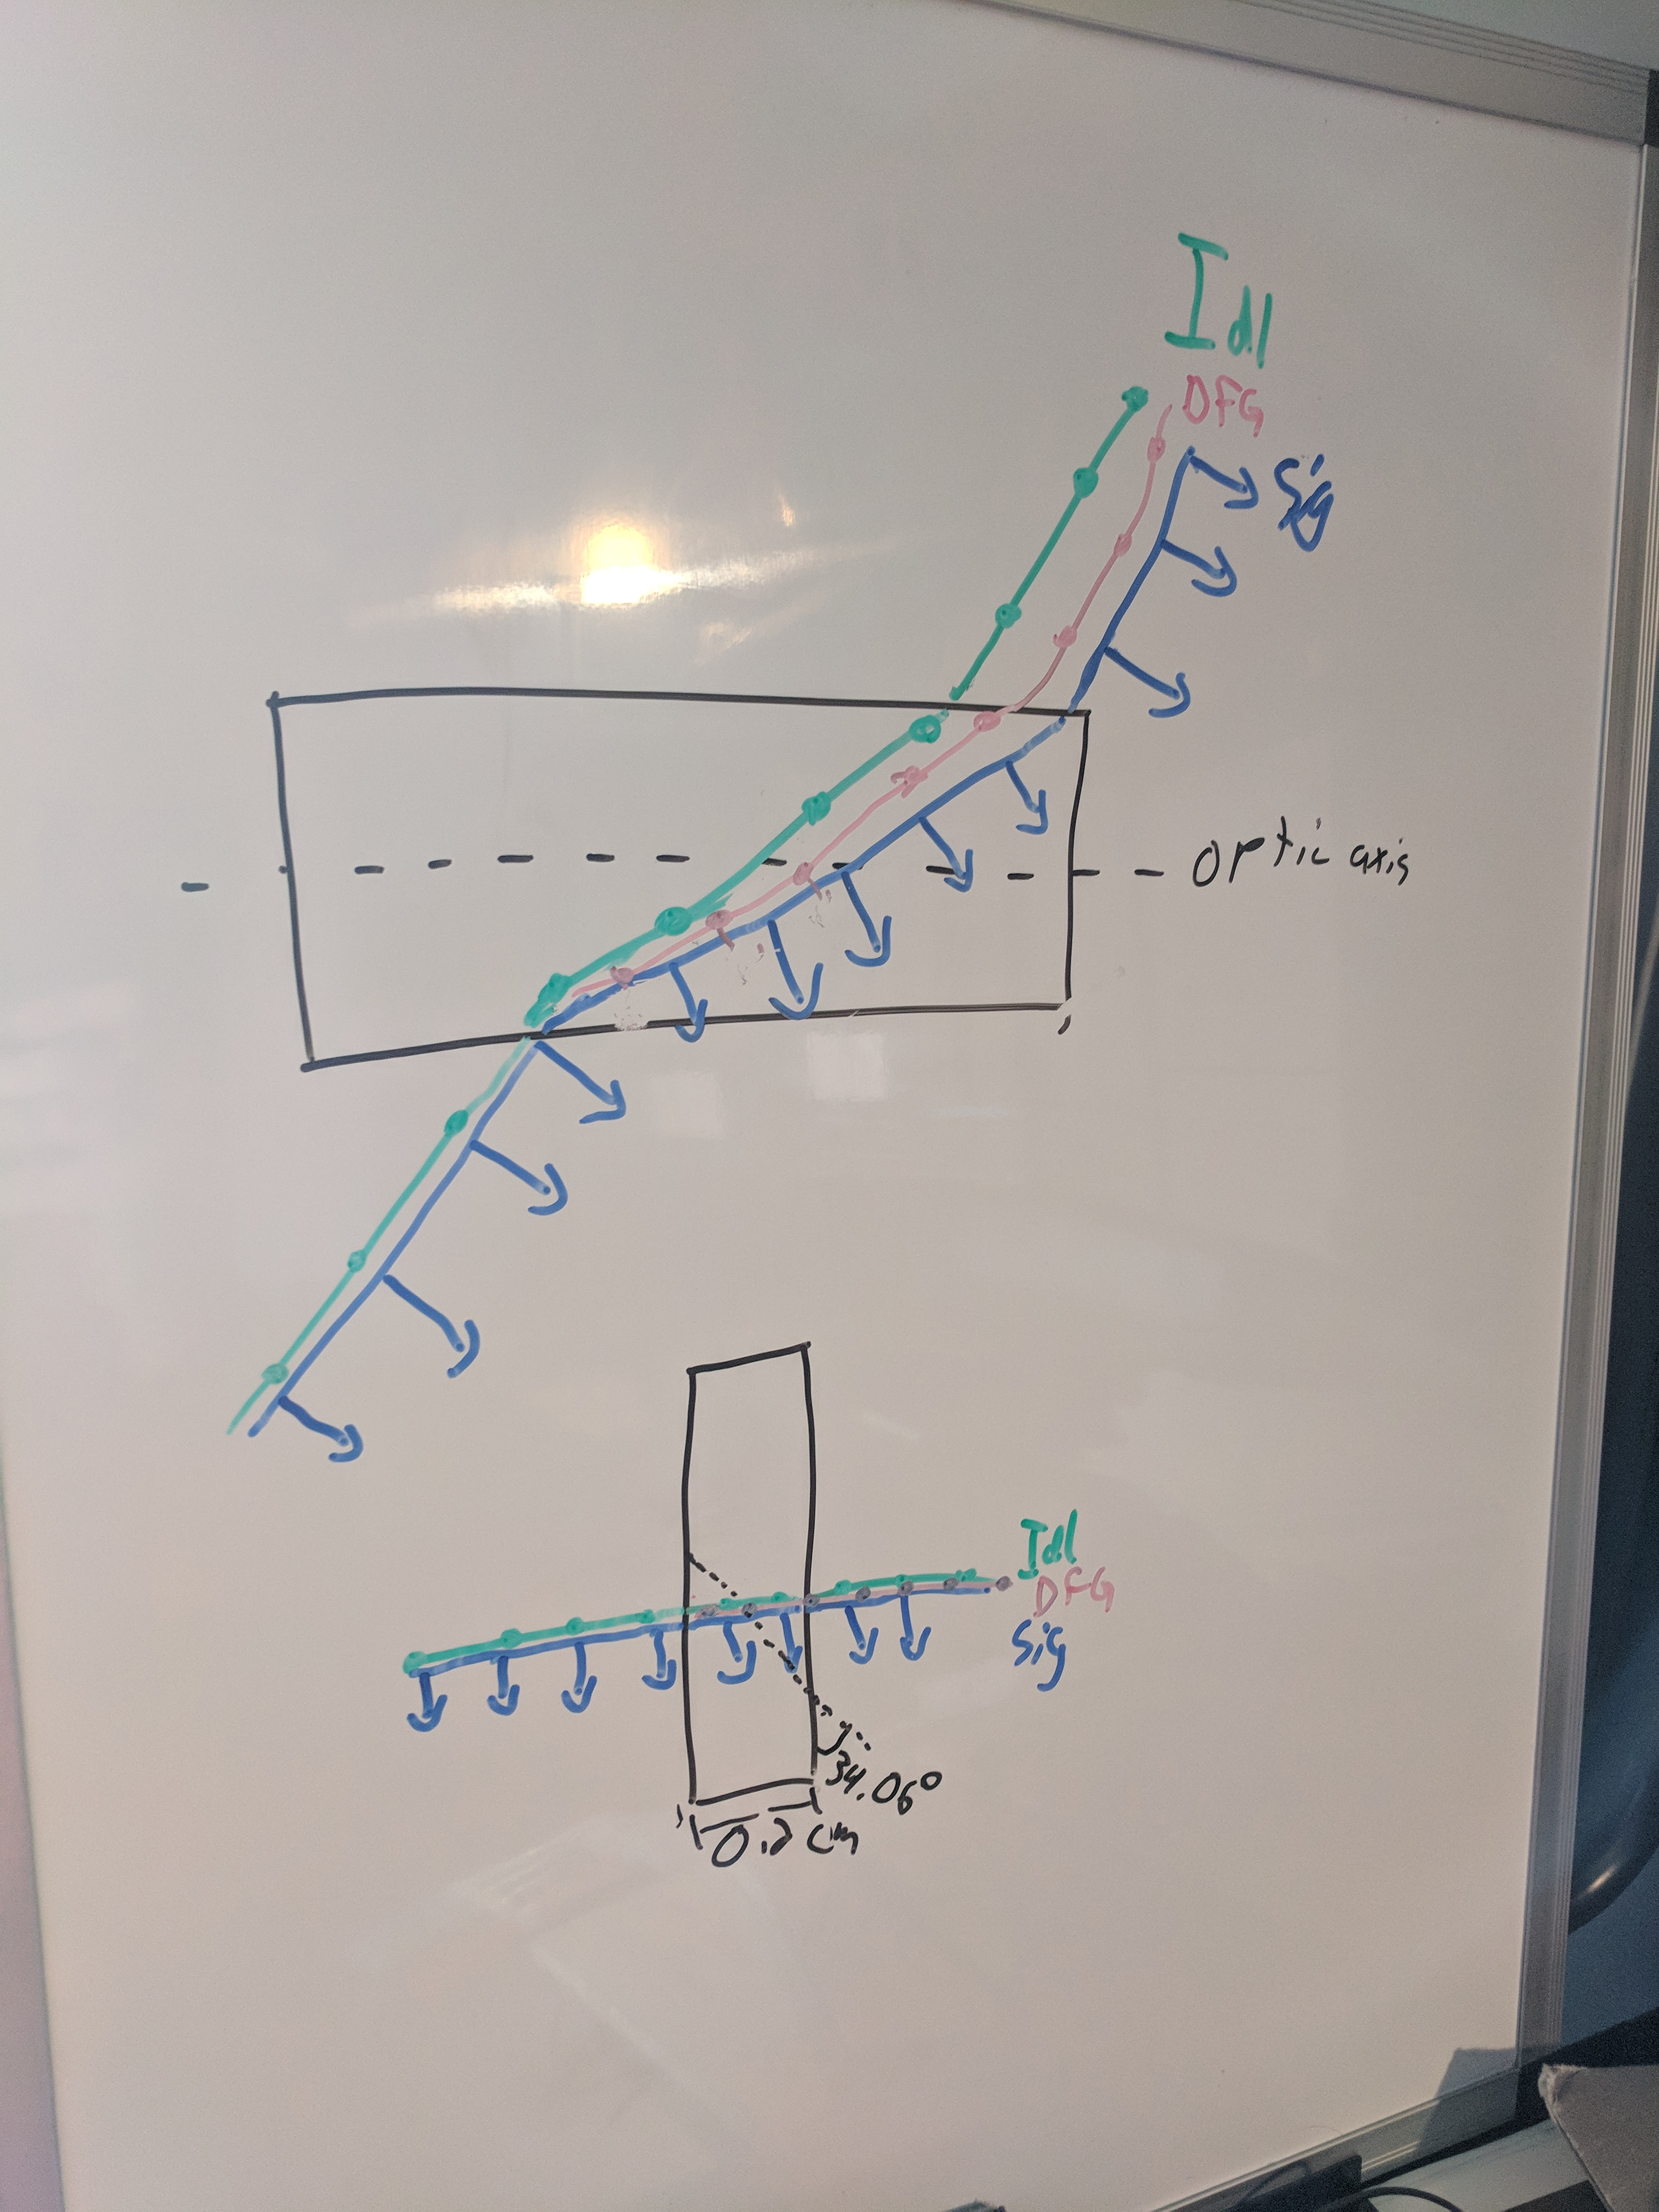

In [46]:
#<img src='crystal_angle.jpg'>
from IPython.display import Image
Image("crystal_angle.jpg")

# How to cut for perpendicular

The crystal should be cut so that the optic axis is at a 34.06 degree angle with the face of the crystal.

# Bandwith of output signal

0.3600360036003565 deg, FWHM
0.18001800180017824 deg, HWHM


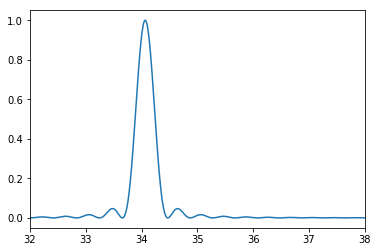

In [45]:
delta_k = 2 * np.pi * phase_mismatch
length = 0.2  # cm

intensity = (np.sin(delta_k * length) / (delta_k * length)) ** 2
plt.plot(angle, intensity)
plt.xlim(32, 38)
max_i = np.argmax(intensity)
left = intensity[:max_i]
right = intensity[max_i:]

left_i = np.argmin(np.abs(left - intensity[max_i] / 2))
right_i = np.argmin(np.abs(right - intensity[max_i] / 2))

FWHM = angle[max_i + right_i] - angle[left_i]
print(FWHM, "deg, FWHM")
print(FWHM / 2, "deg, HWHM")